In [1]:
import pandas as pd
import dotenv

In [2]:
from dotenv import load_dotenv

In [3]:
load_dotenv()

True

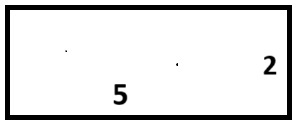

In [4]:
from IPython.display import Image, display, Audio, Markdown
import base64

IMAGE_PATH = r"data/rectange.jpg"

# Preview image for context
display(Image(IMAGE_PATH))

In [5]:
from openai import OpenAI 
import os

## Set the API key and model name
MODEL="gpt-4o-mini"
client = OpenAI(api_key=os.environ.get("OPENAI_API_KEY", "<your OpenAI API key if not set as an env var>"))

In [6]:
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")

base64_image = encode_image(IMAGE_PATH)

response = client.chat.completions.create(
    model=MODEL,
    messages=[
        {"role": "system", "content": "You are a helpful assistant that responds in json. Help me with my math homework!"},
        {"role": "user", "content": [
            {"type": "text", "text": "What's the area of the rectangle?"},
            {"type": "image_url", "image_url": {
                "url": f"data:image/png;base64,{base64_image}"}
            }
        ]}
    ],
    temperature=0.0,
)

print(response.choices[0].message.content)

To find the area of a rectangle, you can use the formula:

\[
\text{Area} = \text{Length} \times \text{Width}
\]

From the image, the dimensions of the rectangle are:

- Length = 5
- Width = 2

Now, substituting the values into the formula:

\[
\text{Area} = 5 \times 2 = 10
\]

So, the area of the rectangle is:

```json
{
  "area": 10
}
```
